Chapter 6 of [A Guided Tour of Mathematical ethods for the physical sciences](http://www.cambridge.org/nz/academic/subjects/physics/mathematical-methods/guided-tour-mathematical-methods-physical-sciences-3rd-edition#KUoGXYx5FTwytcUg.97) introduces the divergence of a vector field. Perhaps the most intuitive example is fluid flow in the presence of a source and sink. This flow represents a vector field, in which you could insert test objects (a rubber ducky, anyone?) that would flow a certain path, depending on the distibution of sources and sinks.

Let us plot the 2D fluid flow lines from an injection at x=L and a sink at x=-L from equations 6.17 and 6.18 of Section 6.2. We set $\dot{V} =2 \pi$, to keep life simple:

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
# set up a normalized grid:
dim= 20
xarray= np.arange(-dim,dim)
yarray= np.arange(-dim,dim)

# (fluid) flow from a source at L to a sink at -L:
L = dim/2
x,y = np.meshgrid(xarray,yarray)
vx = (x-L)/((x-L)**2+y**2) - (x+L)/((x+L)**2 +y**2)
vy = y/((x-L)**2+y**2) - y/((x+L)**2 +y**2)

/home/kvan637/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide
/home/kvan637/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide


Our apologies for the "pesky" warning, but can you figure out what invalid value python is complaining about? Where do you think these values are occurring? Right! At the source and sink! Even near these positions the values of the vector field become very large. Let us mask these values (at the expense of more warnings, of course), so they won't dominate any following analysis:

In [41]:
# Masking the singularities at the poles:
threshold = 0.33
Mx = np.abs(vx) > threshold
My = np.abs(vy) > threshold
vx = np.ma.masked_array(vx, mask=Mx)
vy = np.ma.masked_array(vy, mask=My)

/home/kvan637/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/home/kvan637/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


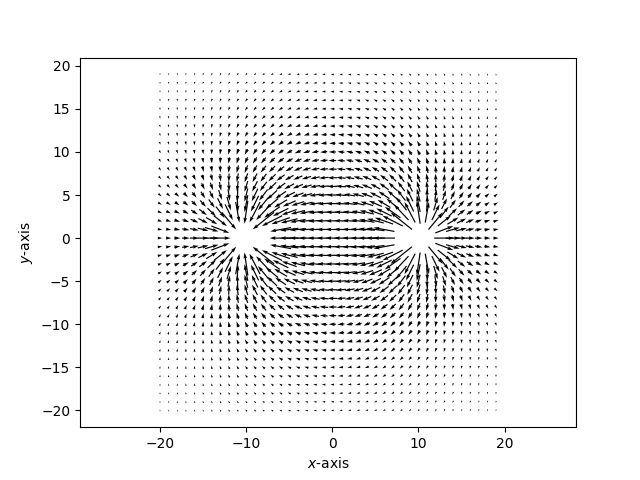

In [42]:
# plot the flow lines:
plt.figure()
plt.quiver(x,y, vx, vy, pivot='mid')
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.axis('equal')
plt.show()

You can see flow out of the source at (10,0), and into the sink at (-10,0). The flux $\Phi$ is the flow rate per unit area:

$$ \Phi_v = \iint {\bf v} \cdot d{\bf S}.$$

Let's define a box in this 2D flow, and compute its flux. Based on the equation above, this is the component of flow perpendicular to the sides of the box. For a box aligned with the x- and y-axis, flow through the sides is defined by $\pm v_y$, and out the top and bottom by $\pm v_x$: 

<IPython.core.display.Javascript object>


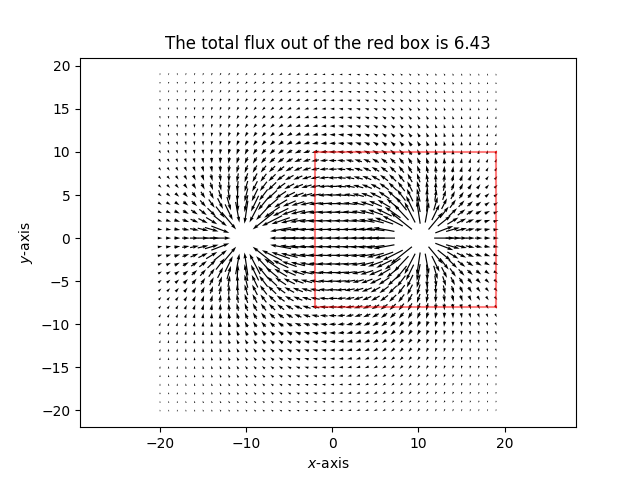

In [43]:
xmin=18
xmax=39
ymin=12
ymax=30

# total flux out the bottom and top:
topandbottomflux = -np.sum(vy[ymin,xmin:xmax+1])+np.sum(vy[ymax,xmin:xmax+1])

# total flux out the left and right side:
sideflux = -np.sum(vx[ymin:ymax+1,xmin])+np.sum(vx[ymin:ymax+1,xmax])

# net flux out of the box:
totalflux = sideflux + topandbottomflux

# plot flux and box:
plt.figure()
plt.title('The total flux out of the red box is {:.3}'.format(totalflux))
# the flux:
plt.quiver(x,y, vx, vy, pivot='mid')
# bottom, top, left and right side of the box, respectively:
plt.plot(x[ymin,xmin:xmax+1],y[ymin,xmin:xmax+1],'r',alpha=0.5)
plt.plot(x[ymax,xmin:xmax+1],y[ymax,xmin:xmax+1],'r',alpha=0.5)
plt.plot(x[ymin:ymax+1,xmin],y[ymin:ymax+1,xmin],'r',alpha=0.5)
plt.plot(x[ymin:ymax+1,xmax],y[ymin:ymax+1,xmax],'r',alpha=0.5)
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.axis('equal')
plt.show()

The box surrounding the source has a positive flux of +6.43. A box around the sink, you guessed it, has a net flow inward:

<IPython.core.display.Javascript object>


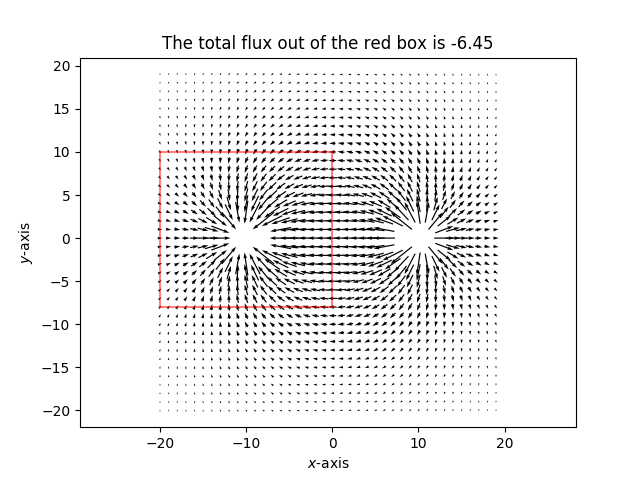

In [44]:
xmin=0
xmax=20
ymin=12
ymax=30

# total flux out the bottom and top:
topandbottomflux = -np.sum(vy[ymin,xmin:xmax+1])+np.sum(vy[ymax,xmin:xmax+1])

# total flux out the left and right side:
sideflux = -np.sum(vx[ymin:ymax+1,xmin])+np.sum(vx[ymin:ymax+1,xmax])

# net flux out of the box:
totalflux = sideflux + topandbottomflux

# plot flux and box:
plt.figure()
plt.title('The total flux out of the red box is {:.3}'.format(totalflux))
# the flux:
plt.quiver(x,y, vx, vy, pivot='mid')
# bottom, top, left and right side of the box, respectively:
plt.plot(x[ymin,xmin:xmax+1],y[ymin,xmin:xmax+1],'r',alpha=0.5)
plt.plot(x[ymax,xmin:xmax+1],y[ymax,xmin:xmax+1],'r',alpha=0.5)
plt.plot(x[ymin:ymax+1,xmin],y[ymin:ymax+1,xmin],'r',alpha=0.5)
plt.plot(x[ymin:ymax+1,xmax],y[ymin:ymax+1,xmax],'r',alpha=0.5)
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.axis('equal')
plt.show()

Notice the box around the source catches ALL the flow out, and the sink ALL the flow in. The absolute values are identical. Therefore, a box covering both has a net flow (rate) of zero:

<IPython.core.display.Javascript object>


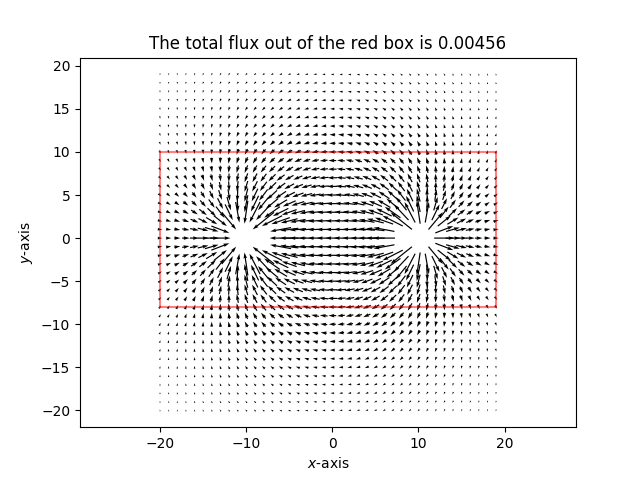

In [45]:

xmin=0
xmax=39
ymin=12
ymax=30

# total flux out the bottom and top:
topandbottomflux = -np.sum(vy[ymin,xmin:xmax+1])+np.sum(vy[ymax,xmin:xmax+1])

# total flux out the left and right side:
sideflux = -np.sum(vx[ymin:ymax+1,xmin])+np.sum(vx[ymin:ymax+1,xmax])

# net flux out of the box:
totalflux = sideflux + topandbottomflux

# plot flux and box:
plt.figure()
plt.title('The total flux out of the red box is {:.3}'.format(totalflux))
# the flux:
plt.quiver(x,y, vx, vy, pivot='mid')
# bottom, top, left and right side of the box, respectively:
plt.plot(x[ymin,xmin:xmax+1],y[ymin,xmin:xmax+1],'r',alpha=0.5)
plt.plot(x[ymax,xmin:xmax+1],y[ymax,xmin:xmax+1],'r',alpha=0.5)
plt.plot(x[ymin:ymax+1,xmin],y[ymin:ymax+1,xmin],'r',alpha=0.5)
plt.plot(x[ymin:ymax+1,xmax],y[ymin:ymax+1,xmax],'r',alpha=0.5)
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.axis('equal')
plt.show()

The net outward flow rate -- or flux -- per unit area (in 2D) or per unit volume (in 3D) is also called "the divergence" of the vector field ${\bf v}$, and can be written as $\nabla\cdot {\bf v}$. In 2D Cartesian coordinates this is 
$$ \nabla\cdot {\bf v} = \frac{\partial v_x}{\partial x}+ \frac{\partial v_y}{\partial y}.$$ The divergence for an area that does not include a source or sink is zero. You can confirm this, by calculating the surface integral or we can approximate numerically:

<IPython.core.display.Javascript object>


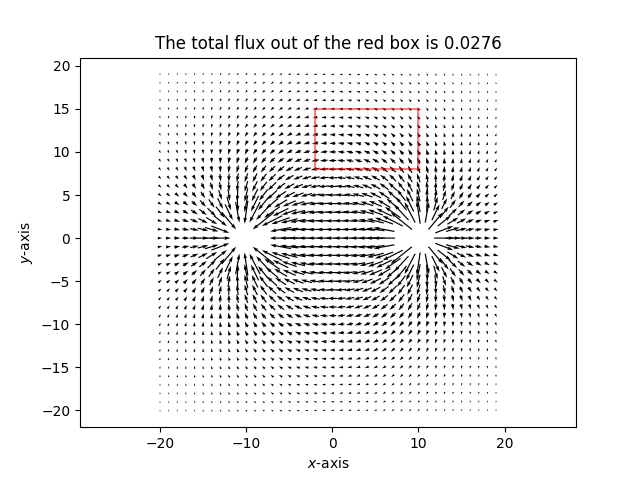

In [46]:
xmin=18
xmax=30
ymin=28
ymax=35

# total flux out the bottom and top:
topandbottomflux = -np.sum(vy[ymin,xmin:xmax+1])+np.sum(vy[ymax,xmin:xmax+1])

# total flux out the left and right side:
sideflux = -np.sum(vx[ymin:ymax+1,xmin])+np.sum(vx[ymin:ymax+1,xmax])

# net flux out of the box:
totalflux = sideflux + topandbottomflux

# plot flux and box:
plt.figure()
plt.title('The total flux out of the red box is {:.3}'.format(totalflux))
# the flux:
plt.quiver(x,y, vx, vy, pivot='mid')
# bottom, top, left and right side of the box, respectively:
plt.plot(x[ymin,xmin:xmax+1],y[ymin,xmin:xmax+1],'r',alpha=0.5)
plt.plot(x[ymax,xmin:xmax+1],y[ymax,xmin:xmax+1],'r',alpha=0.5)
plt.plot(x[ymin:ymax+1,xmin],y[ymin:ymax+1,xmin],'r',alpha=0.5)
plt.plot(x[ymin:ymax+1,xmax],y[ymin:ymax+1,xmax],'r',alpha=0.5)
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.axis('equal')
plt.show()

The finer the discretization of the equation describing the vector field for flow, the closer the numerical value for the divergence would go to zero. Anyway, the take-home message is that the outward flux per unit area, or the divergence of the vector field, is zero if the box does not include sources or sinks.

We used the model of fluid flow as our vector field, but a distribution of charges would set up an electric ${\bf E}$ vector field, and masses would result in a gravitational field ${\bf g}$. For the case of the vector magnetic field ${\bf B}$, the divergence is always zero ($\nabla\cdot {\bf B}= 0$), because we either have not encompassed any sources/sinks, or we included a north and a south pole as magnetic monopoles have never been observed. 

Chapter 6 discusses further examples, expands the divergence operator to cylindrical and spherical coordinates, and shows you how life is not possible in a 5-dimensional world. The divergence discussion here got us one line away from stating Gauss' Law, but before we do so, let us look at another operator on a vector field: the curl. Let's get back to the [overview of jupyter notebooks](https://pal.blogs.auckland.ac.nz/2017/12/02/jupyter-notebooks-for-mathematical-methods-in-the-physical-sciences/)!